# Stock Price Prediction Using LSTM

This project aims to develop a prediction model to predict the future stock prices of any company using LSTM (Long Short Term Memory) Neural Network.

![Stock Price Prediction System Overview](Stockprediction.jpg)

## Project Overview
- **1) Importing the dependencies** - The required libraries and modules are imported first to work with our project
- **2) Dataset Collection** - The stock dataset is imported for a particular company and the closing stock prices are going to be analysed.
- **3) Exploratory Data Analysis** - The dataset is analysed visually to see the trends.
- **4) Data Preprocessing** - The dataset is scaled to increase the effiency of the LSTM Network and the dataset is splitted into training and testing sets
- **5) Network Training** - Then the LSTM network is trained with the suitable number of dense layers and epochs
- **6) Prediction** - The predictions are made using the trained network
- **7) Evaluation** - Finally, the network is evaluated using MSE, RMSE and R2 Score.

## 1) Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score

## 2) Data Collection

Here, I used the yfinance library to download the stock dataset of Google.


This dataset compromises of the stock prices from the year 2013 to the year 2022 (10 Years)

In [2]:
import yfinance as yf

start = '2013-01-01'
end = '2022-12-31'

df = yf.download('GOOG', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


## 3) Exploratory Data Analysis

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700
2022-12-30,87.364998,88.830002,87.029999,88.730003,88.730003,19190300


In [5]:
df = df.reset_index() 

In [6]:
df.drop(['Date', 'Adj Close'], axis = 1, inplace = True)

In [7]:
df.head()

,Open,High,Low,Close,Volume
0,17.918339,18.107130,17.846855,18.013729,102033017
1,18.055573,18.229919,17.950716,18.024191,93075567
2,18.165413,18.467529,18.124067,18.380356,110954331
3,18.317591,18.415474,18.196297,18.300158,66476239
4,18.319834,18.338762,18.043119,18.264042,67295297


### Visualizations

The closing stock prices are visualized here with the 100 and 200 days moving averages

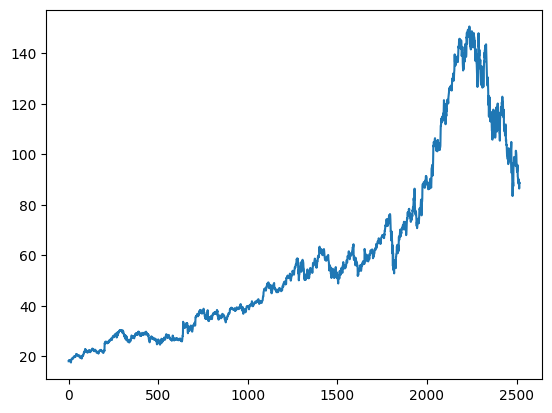

In [8]:
plt.plot(df['Close'])
plt.show()

**Moving averages are widely used in statistical analysis and time series forecasting. They provide a smoothed representation of data by calculating the average value of a subset of data points over a specified window or period.**

In [9]:
ma100 = df['Close'].rolling(100).mean() #Moving Average for 100 Days

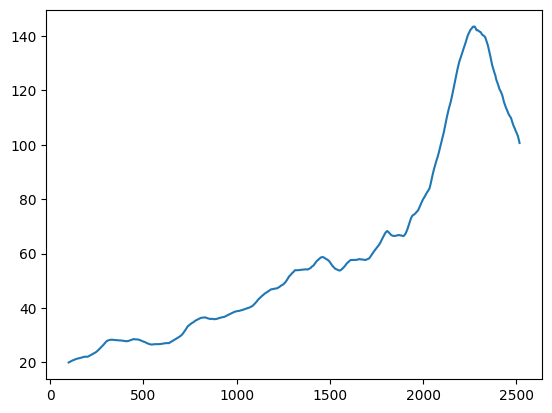

In [10]:
plt.plot(ma100)
plt.show()

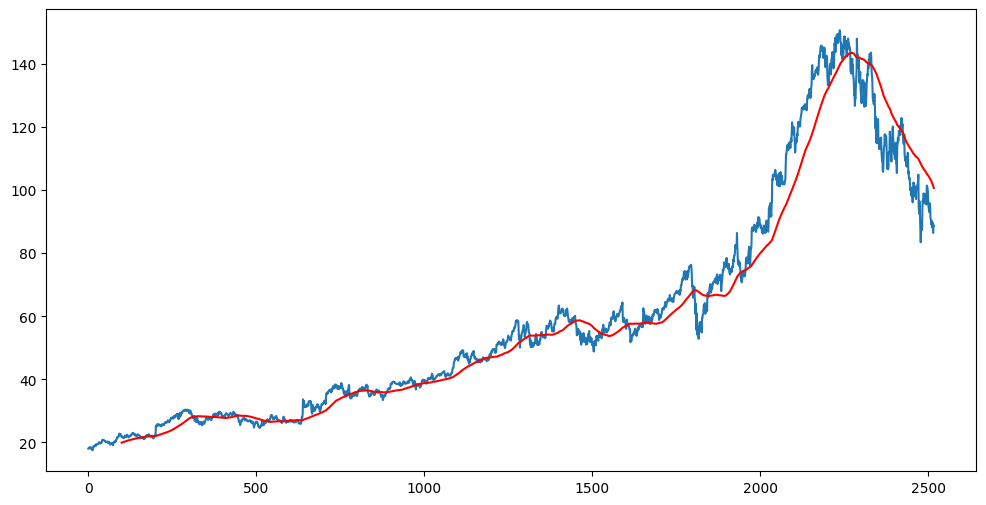

In [11]:
#Plotting the close column with 100 days moving average
plt.figure(figsize = (12, 6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.show()

In [12]:
ma200 = df['Close'].rolling(200).mean() #Moving Average for 200 Days

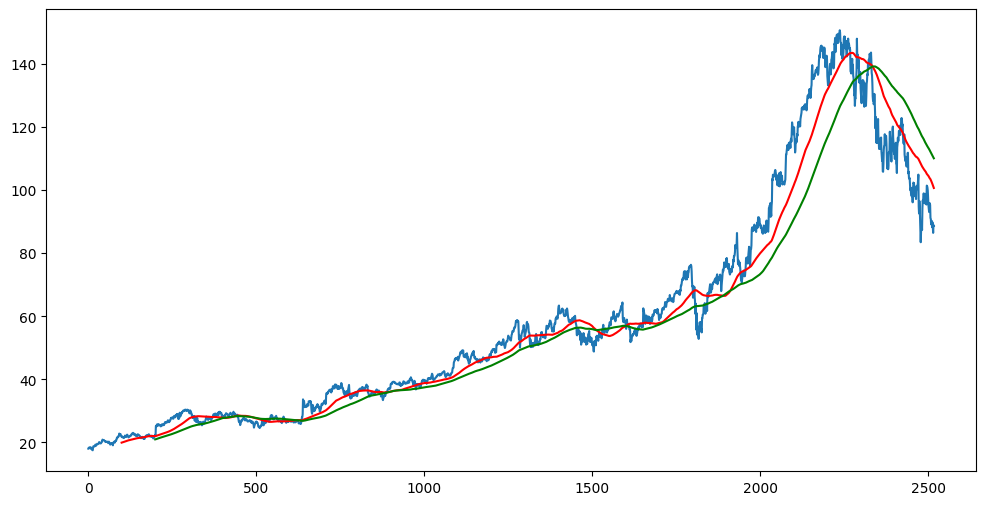

In [13]:
#Plotting the close column with 100 and 200 days moving average
plt.figure(figsize = (12, 6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g') 
plt.show()

## 4) Data Preprocessing

The dataset is splitted into training and testing sets

In [14]:
data_train = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df) * 0.70):])

Then, those are scaled down by using MinMaxScaler() for the efficiency of the LSTM Network

In [15]:
scaler = MinMaxScaler() #Default scaling range is from 0 to 1

In [16]:
data_train_new = scaler.fit_transform(data_train)
data_test_new = scaler.fit_transform(data_test)

In order to predict the Day 101th stock, we need the previous 100 days of stock prices.

So, we're shifting the training set by 100 days for each subsequent day and the corresponding prices are stored in the x_train and y_train lists

**NOTE:** x_train stores a list of 100 values, whereas the y_train stores only one value in each iteration which is the subsequent 101th Day

In [17]:
x_train = []
y_train = []
for i in range(100, data_train_new.shape[0]):
    x_train.append(data_train_new[i-100 : i])
    y_train.append(data_train_new[i, 0])

In [18]:
x_train, y_train = np.array(x_train), np.array(y_train) #They are converted into numpy arrays respectively

In [19]:
x_train.shape

(1662, 100, 1)

## 5) Network Training 

The LSTM Network is trained with the help of the x_train and y_train with a total of 5 layers and 50 epochs using a simple rectified linear unit as an activation function

**Note: The Dropout rate is used to reduce the dependancy of the network on certain input value and thereby compensates the effect of Overfitting.**

## LSTM (Long Short-Term Memory)

### Overview
LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture that is widely used for sequential data analysis, such as time series forecasting and natural language processing. LSTM networks are designed to address the limitations of traditional RNNs in capturing long-term dependencies in sequential data.

### Key Concepts
- **Memory Cells**: LSTM networks contain memory cells that allow the network to store and access information over long sequences. Memory cells have the ability to retain information for extended periods and prevent the vanishing gradient problem commonly encountered in traditional RNNs.
- **Gates**: LSTM networks utilize gates to control the flow of information within the network. The key gates in an LSTM cell are the input gate, forget gate, and output gate. These gates regulate the information flow by selectively determining which information to remember, forget, or output at each time step.
- **Cell State**: The cell state is a horizontal line that runs through the entire sequence of LSTM cells. It acts as a conveyor belt, allowing information to flow along the sequence while selectively adding or removing information through the gates.
- **Hidden State**: The hidden state is the output of an LSTM cell at a particular time step. It contains the relevant information that the LSTM has learned from the input sequence up to that point and can be used for making predictions or further processing.

### Benefits of LSTM
- **Long-Term Dependencies**: LSTM networks can capture long-term dependencies in sequential data, making them effective for tasks that involve analyzing and predicting patterns over extended periods.
- **Preventing Vanishing/Exploding Gradient**: By utilizing memory cells and gates, LSTM networks can address the vanishing/exploding gradient problem that arises in traditional RNNs when training on long sequences.
- **Handling Variable-Length Inputs**: LSTM networks can handle variable-length input sequences by dynamically adjusting the memory cells and gates based on the length of the input sequence.

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
          
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
          
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') #Adam is used as the learning rate optimizer and the loss function is mean squared error
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 10s 127ms/step - loss: 0.0528
Epoch 2/50
52/52 [==============================] - 6s 124ms/step - loss: 0.0106
Epoch 3/50
52/52 [==============================] - 7s 125ms/step - loss: 0.0082
Epoch 4/50
52/52 [==============================] - 7s 125ms/step - loss: 0.0083
Epoch 5/50
52/52 [==============================] - 7s 126ms/step - loss: 0.0069
Epoch 6/50
52/52 [==============================] - 7s 126ms/step - loss: 0.0068
Epoch 7/50
52/52 [==============================] - 7s 129ms/step - loss: 0.0068
Epoch 8/50
52/52 [==============================] - 7s 135ms/step - loss: 0.0069
Epoch 9/50
52/52 [==============================] - 7s 138ms/step - loss: 0.0065
Epoch 10/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0059
Epoch 11/50
52/52 [==============================] - 7s 138ms/step - loss: 0.0062
Epoch 12/50
52/52 [==============================] - 7s 141ms/step - loss: 0.0061
Epoch 13/50
52/52 [=====

In [23]:
model.save('keras_model.h5') #This model is saved to load the model for the web app

In [24]:
past_100_days = data_train.tail(100) #For testing set, we need the previous 100 days to predict the subsequent 101th Day
final_df = pd.concat([past_100_days, data_test], ignore_index = True) #Combining the test set with the previous 100 days of training

In [25]:
input_data = scaler.fit_transform(final_df) #Scaling down
input_data.shape

(856, 1)

In [26]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [27]:
x_test, y_test = np.array(x_test), np.array(y_test)

## 6) Prediction

The trained neural network is used to predict the training set of the data

In [28]:
#Making Predictions for train_data

pred_train = model.predict(x_train)

52/52 [==============================] - 3s 41ms/step


In [29]:
scale_factor = scaler.scale_
scale_factor = 1/scale_factor

#To scale up the values to the original values
y_train = y_train * scale_factor
pred_train = pred_train * scale_factor

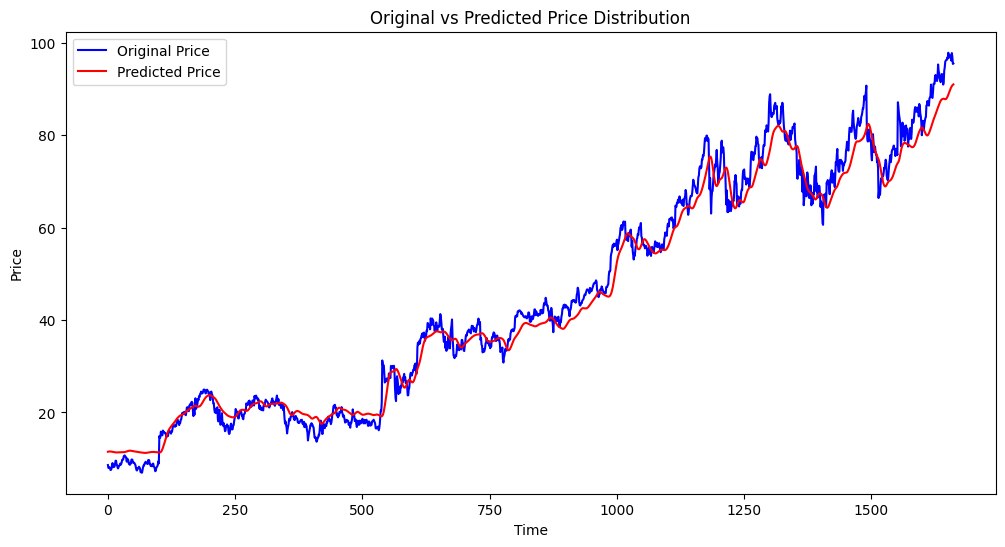

In [32]:
#Plotting the original vs predicted stock prices
plt.figure(figsize = (12, 6))
plt.plot(y_train, 'b', label = 'Original Price')
plt.plot(pred_train, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Original vs Predicted Price Distribution')
plt.legend() 
plt.show()

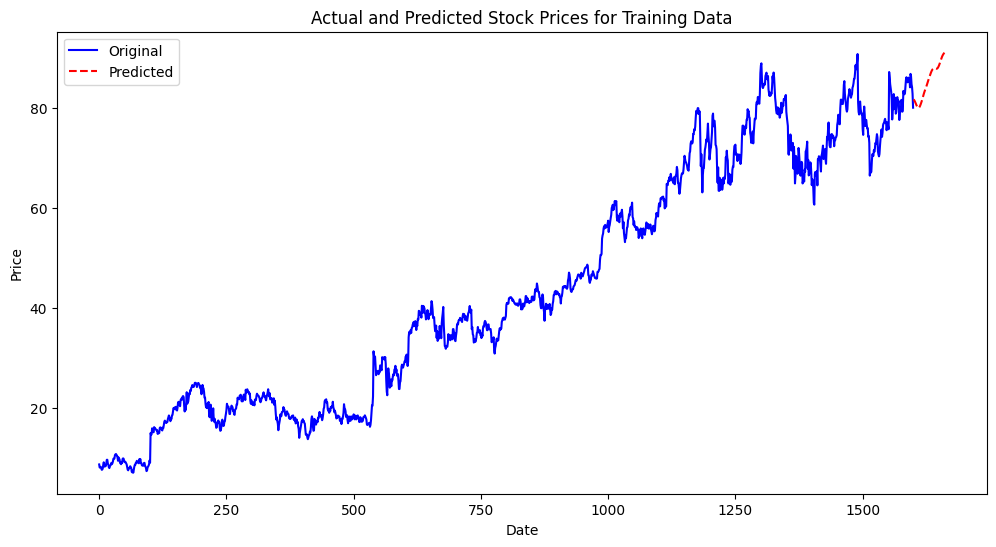

In [33]:
# Plot predicted stock data for training data
plt.figure(figsize = [12, 6])
plt.plot(range(1600), y_train[:1600], 'b', label='Original')

# Plot predicted stock prices starting from index 700
plt.plot(range(1600, len(pred_train)), pred_train[1600:], 'r', label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Predicted Stock Prices for Training Data')
plt.legend()
plt.show()

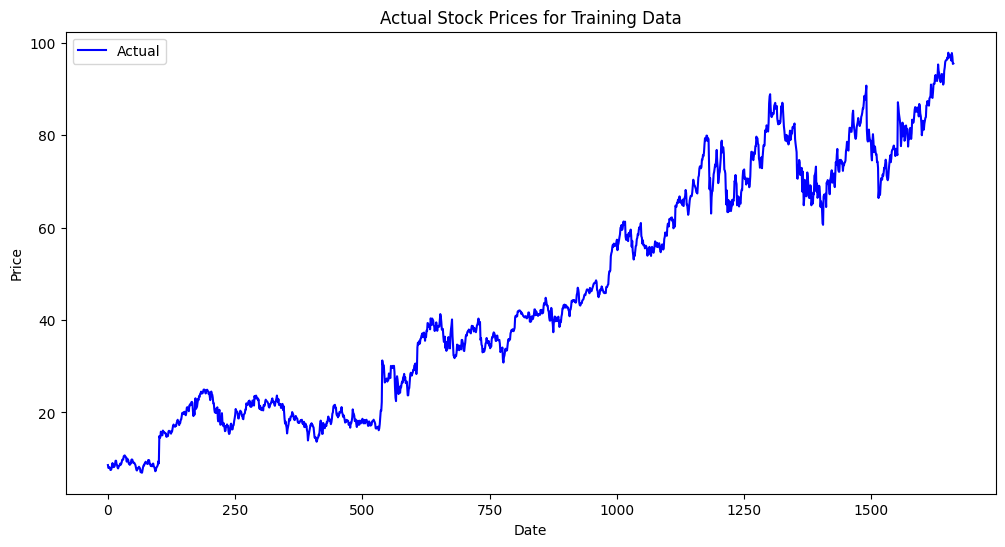

In [34]:
# Plot actual stock data
plt.figure(figsize = (12, 6))
plt.plot(y_train, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Stock Prices for Training Data')
plt.legend()
plt.show()

In [35]:
#Making Predictions for test_data

y_pred = model.predict(x_test)

24/24 [==============================] - 1s 40ms/step


In [36]:
scale_factor = 1/scaler.scale_
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

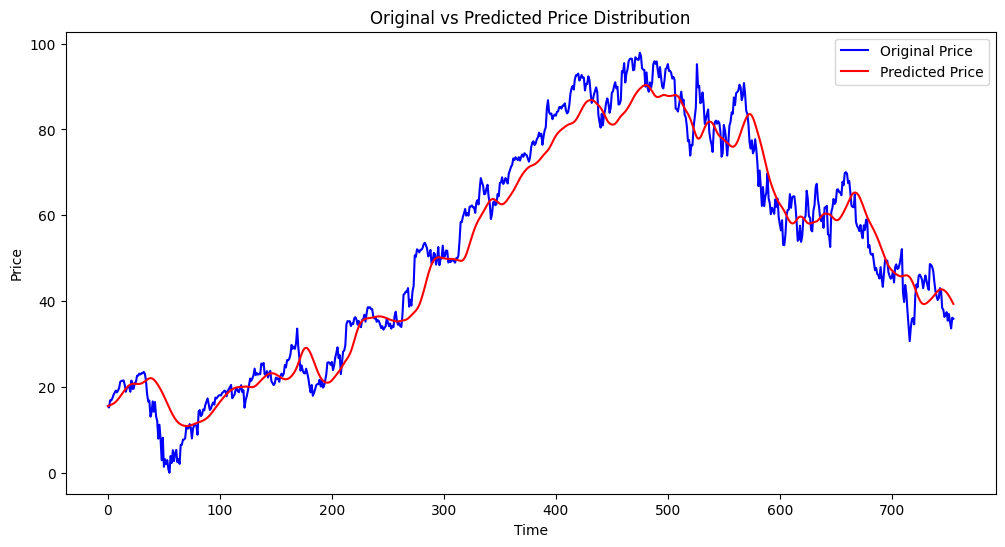

In [37]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Original vs Predicted Price Distribution')
plt.legend() 
plt.show()

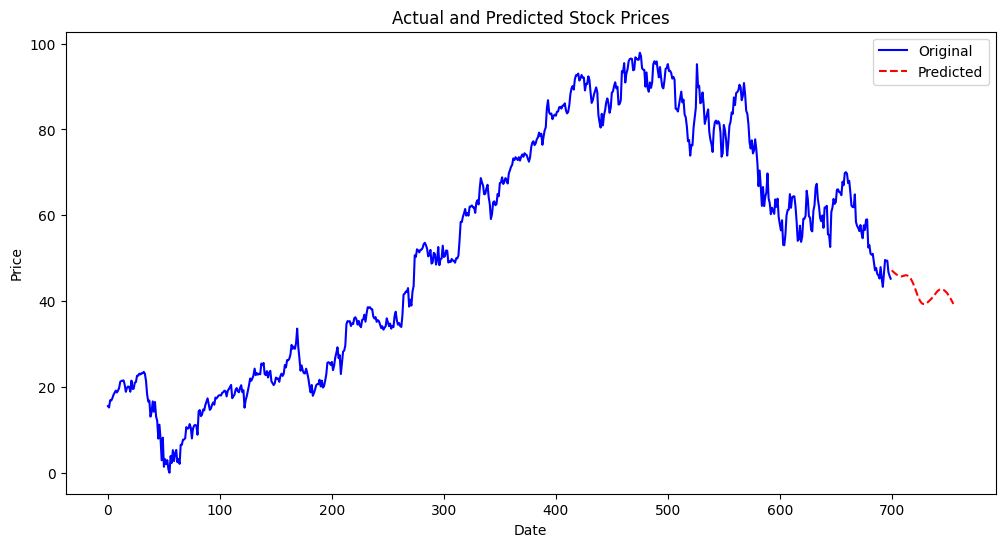

In [38]:
# Plot predicted stock data
plt.figure(figsize = [12, 6])
plt.plot(range(700), y_test[:700], 'b', label='Original')

# Plot predicted stock prices starting from index 700
plt.plot(range(700, len(y_pred)), y_pred[700:], 'r', label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual and Predicted Stock Prices')
plt.legend()
plt.show()

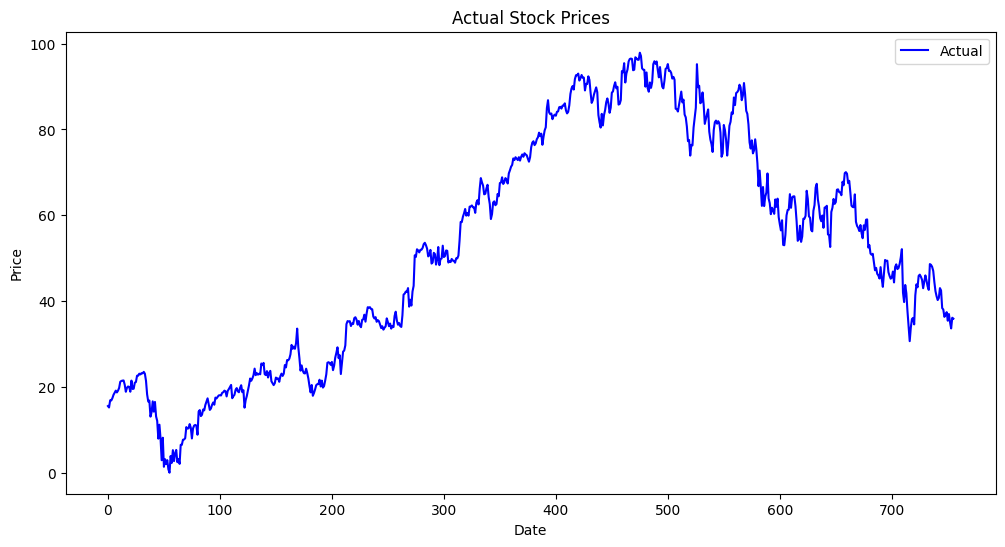

In [39]:

# Plot actual stock data
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Stock Prices')
plt.legend()
plt.show()

## 7) Evaluation

The trained neural network is evaluated using some metrics like Mean Squared Error, Root Mean Squared Error and R2 Score

In [40]:
#Evaluation for training set

mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, pred_train)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse_train))
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

The model performance for training set
--------------------------------------
MSE is 12.1046326422316
RMSE is 3.47917125796239
R2 score is 0.9812405322623505




In [41]:
#Evaluation for testing set

mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse_test))
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))
print("\n")

The model performance for testing set
--------------------------------------
MSE is 30.43905912862681
RMSE is 5.5171604225930215
R2 score is 0.957591566227133




Hence, the neural network performed well based on these evaluation metrics

## THE END